In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Full rates

In [156]:
EXPERIMENT = 'oracle_rates'

df = pd.read_csv(f'./results/{EXPERIMENT}_results.csv', sep=', ', engine='python')

df['Fraction of shifting mechanisms'] = df['sparsity'] / df['n_variables']

In [157]:
# plot_df = df.melt(
#     id_vars=[
#         'params_index', 'n_variables', 'n_total_environments', 'sparsity',
#         'sample_size', 'dag_density', 'reps', 'data_simulator', 'dag_simulator',
#         'Method', 'Number of environments', 'Rep', 'MEC size', 'Soft'],
#     # value_vars=['True orientation rate', 'False orientation rate', 'Avg precision'], # 'Fraction of possible DAGs'], 
#     value_vars=['Recall'], # 'Precision', 
#     var_name='Recall',
#     value_name='Average fraction',
# )

In [158]:
df = df.rename(
        {
            'n_variables': '# vars',
            'dag_density': 'Edge density',
            'sparsity': '# shifts',
            'sample_size': '# samples',
            'n_total_environments': '# environments'
        }, axis=1
    ).replace(
        {'er': 'Erdos-Renyi', 'ba': 'Hub', 'PC (pool all)': 'Full PC (oracle)'}
    )

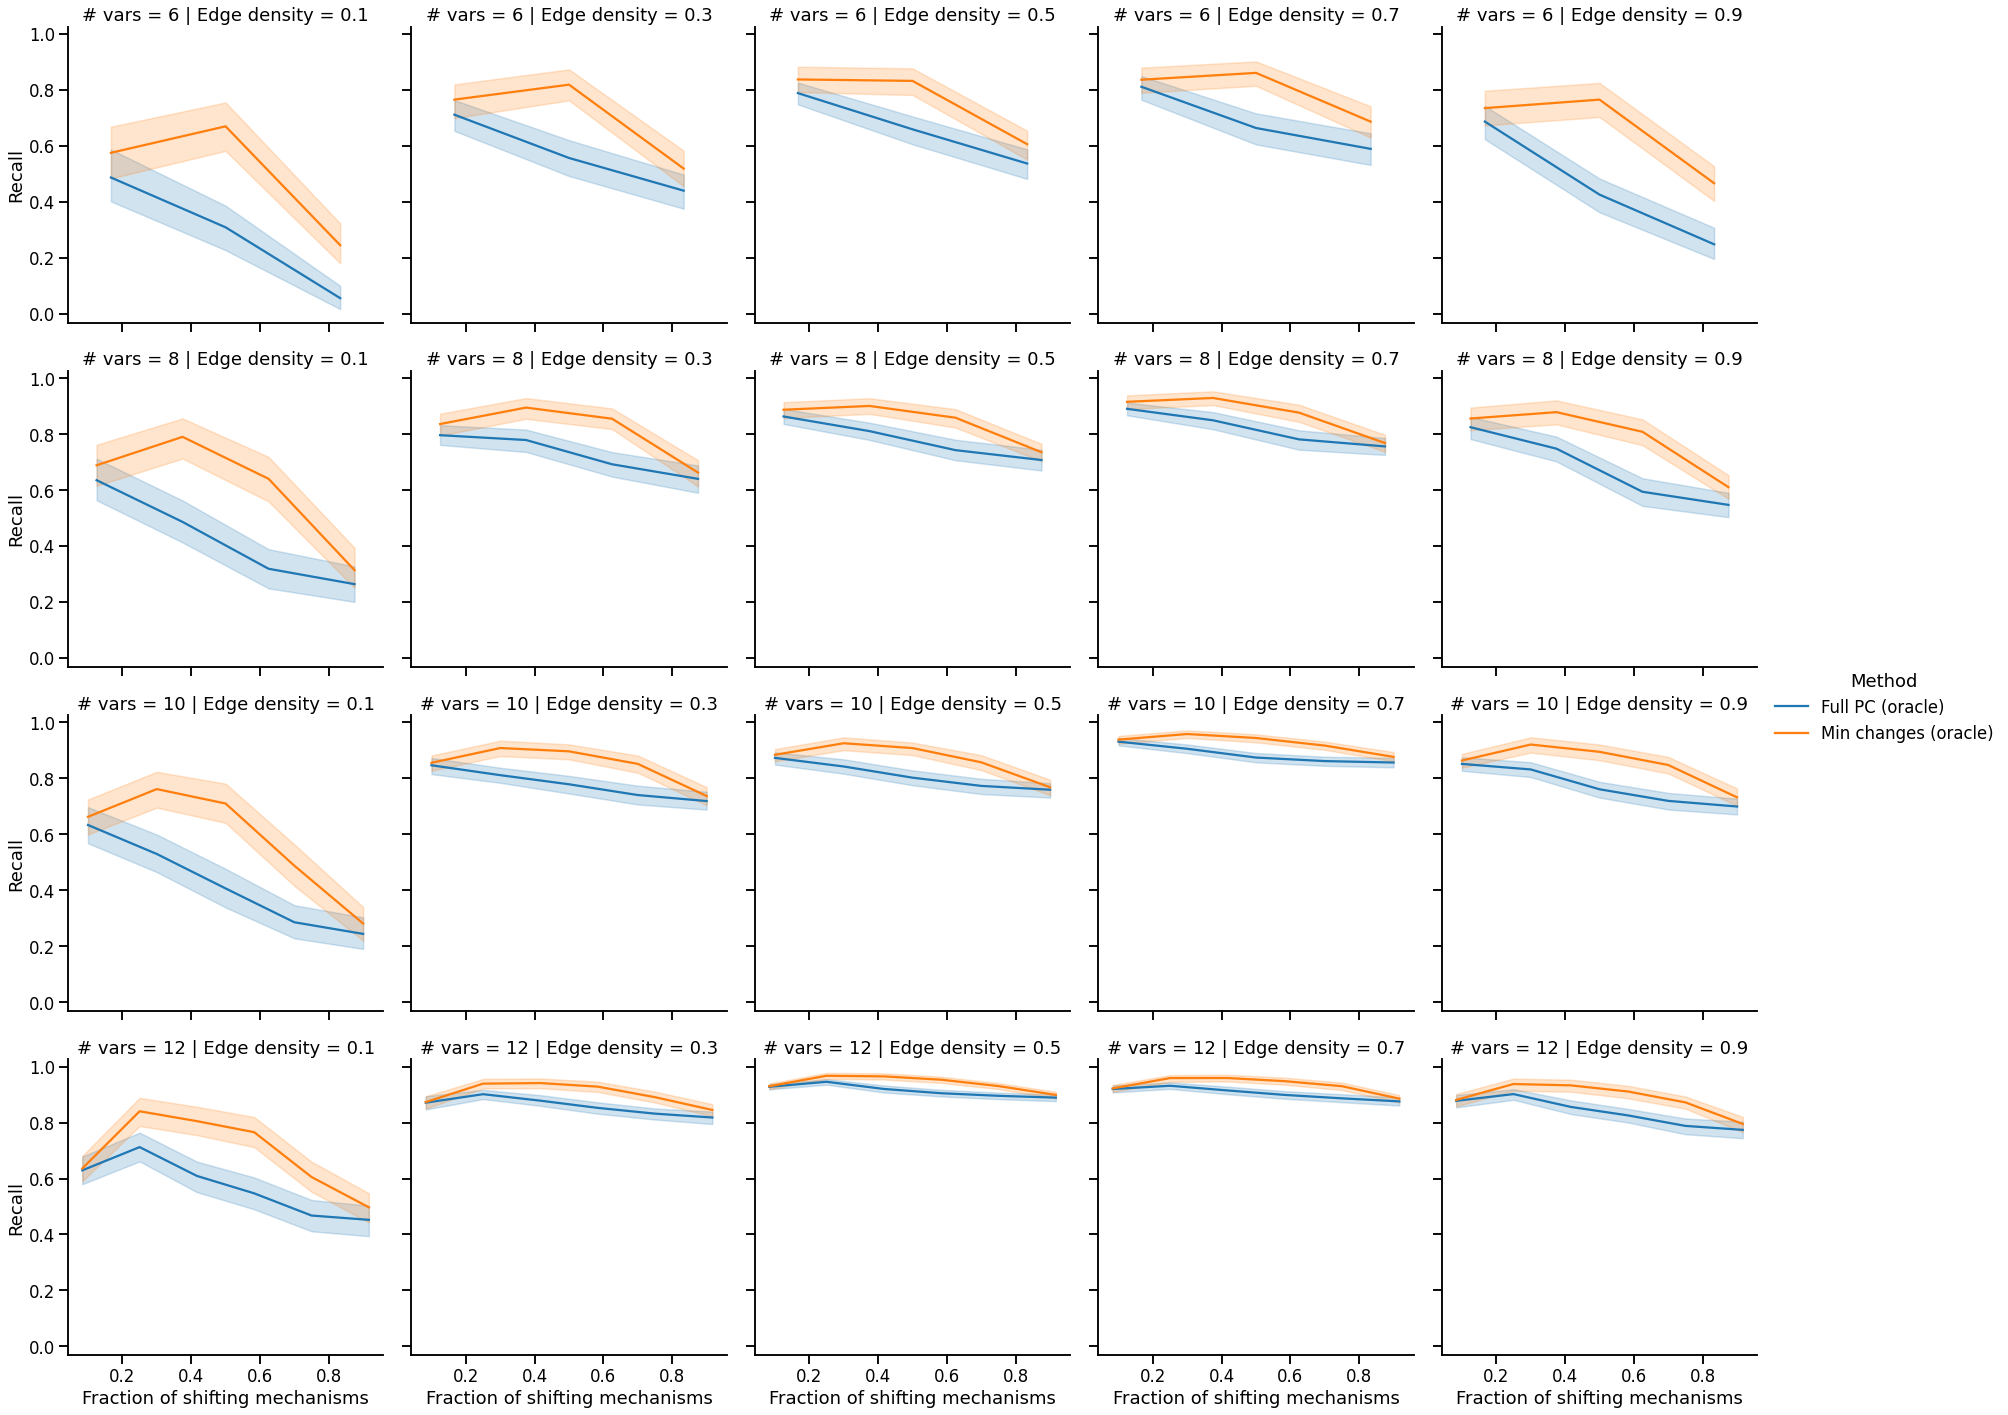

In [159]:
sns.set_context('talk')

for n_env in [5]:
    g = sns.relplot(
        data=df[
            (df['# environments'] == n_env)
        ],
        x='Fraction of shifting mechanisms',
        y='Recall',
        hue='Method',
        row='# vars',
        col='Edge density',
        # ci=None,
        # style='Metric',
        kind='line',
        # height=3,
        # aspect=2, # 3,
        # legend='Full',
        # facet_kws={'sharey': False, 'sharex': True},
    )
    
plt.savefig('./figures/er_oracle_rate_relplot.pdf')

## Marginal rates

In [161]:
EXPERIMENT = 'oracle_select_rates'

df = pd.read_csv(f'./results/{EXPERIMENT}_results.csv', sep=', ', engine='python')

df['Fraction of shifting mechanisms'] = df['sparsity'] / df['n_variables']

df = df.rename(
        {
            'n_variables': 'Number of variables',
            'dag_density': 'Edge density',
            'sparsity': 'Number of shifts',
            'sample_size': '# samples',
            'n_total_environments': 'Total environments',
        }, axis=1
    ).replace(
        {'er': 'Erdos-Renyi', 'ba': 'Hub', 'PC (pool all)': 'Full PC (oracle)'}
    )

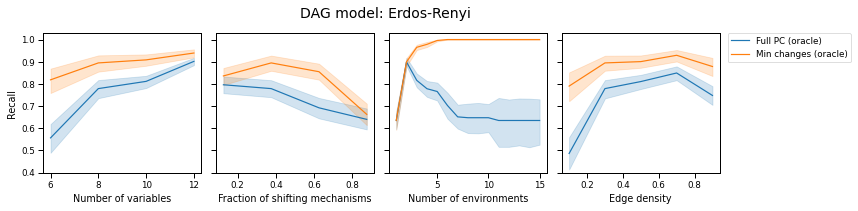

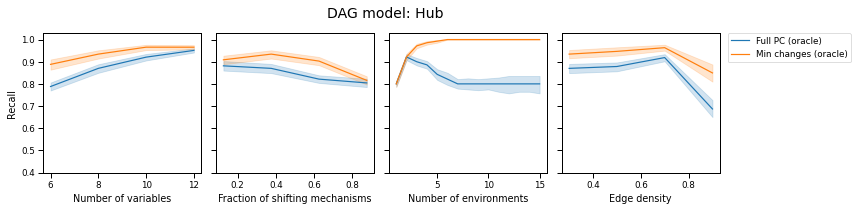

In [163]:
sns.set_context('paper')

plot_df = df

grid_vars = [
    'Number of variables', 'Fraction of shifting mechanisms', 'Number of environments', 'Edge density'
]

indices = [
    (0, 8), (8, 16), (16, 30), (30, 40)
]

for graph_model in plot_df['dag_simulator'].unique():
    fig, axes = plt.subplots(1, 4, sharey=True, figsize=(12, 3))

    for g_var, (lb, ub), ax in zip(grid_vars, indices, axes.flatten()):
        sns.lineplot(
            data=plot_df[
                (plot_df['params_index'] >= lb) &
                (plot_df['params_index'] < ub) &
                (plot_df['dag_simulator'] == graph_model)
            ],
            # data=plot_df.groupby([g_var, 'Test']).mean().reset_index(),
            x=g_var,
            y='Recall',
            hue='Method',
            # style="Test",
            ax=ax,
            # markers=['d', 'P', 's'],
            # palette='Set1',
            legend='full',
            # alpha=1,
        )

        # ax.axvline(0.05, ls=':', c='grey')
        # ax.set_title('')
        # ax.legend(loc='upper right')

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    for ax in axes[:-1]:
        ax.get_legend().remove()
        
    plt.ylim([0.4, 1.03])
        
    plt.suptitle(f'DAG model: {graph_model}', fontsize=14, y=0.96, x=0.45)
    plt.tight_layout()
    plt.savefig(f'./figures/er_oracle_select_rates_{graph_model}.pdf')
    plt.show()